In [1]:
import yaml
import matplotlib.pyplot as plt
from lvmsurveysim import IFU, Telescope
from lvmsurveysim.schedule import ObservingPlan, Simulator, TileDB
from lvmsurveysim.target import Target, TargetList
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.visualization import MinMaxInterval, PercentileInterval, SqrtStretch, ImageNormalize
from regions import PixCoord, PolygonSkyRegion

# Possible new tiling pattern for SMC using 2 elliptical regions

In [2]:
with open('./smc_2reg.yaml', 'r') as f:
    tgt = yaml.safe_load(f)
tgt

{'SMCwest': {'coords': [13.1583, -72.8003],
  'region_type': 'ellipse',
  'frame': 'icrs',
  'region_params': {'a': 2.8, 'b': 1.6, 'pa': 45},
  'priority': 30,
  'observatory': 'LCO',
  'telescope': 'LVM-160',
  'max_airmass': 1.75,
  'min_shadowheight': 1.0,
  'exptime': 900,
  'n_exposures': 9,
  'min_exposures': 3,
  'min_moon_dist': 45,
  'max_lunation': 0.25,
  'overhead': 1.1,
  'tiling_strategy': 'center_first',
  'tile_overlap': 0.0416,
  'tile_union': 'SMCwhole',
  'group': ['MCs']},
 'SMCeast': {'coords': [20, -73.2],
  'region_type': 'ellipse',
  'frame': 'icrs',
  'region_params': {'a': 1.5, 'b': 1.0, 'pa': 155},
  'priority': 30,
  'observatory': 'LCO',
  'telescope': 'LVM-160',
  'max_airmass': 1.75,
  'min_shadowheight': 1.0,
  'exptime': 900,
  'n_exposures': 9,
  'min_exposures': 3,
  'min_moon_dist': 45,
  'max_lunation': 0.25,
  'overhead': 1.1,
  'tiling_strategy': 'center_first',
  'tile_overlap': 0.0416,
  'tile_union': 'SMCwhole',
  'group': ['MCs']}}

In [3]:
targets = TargetList(target_file='./smc_2reg.yaml')
print('Tiling Survey ...')
tiledb = TileDB(targets)
tiledb.tile_targets()
#tiledb.tile_table.write('smc_tiles.fits', format='fits', overwrite=True)

Tiling Survey ...
Tiling target TileUnion SMCwhole
   selecting tiles for SMCwest
   selecting tiles for SMCeast


In [4]:
tbl = tiledb.tile_table
tbl

TileID,TargetIndex,Target,Telescope,RA,DEC,PA,TargetPriority,TilePriority,AirmassLimit,LunationLimit,HzLimit,MoonDistanceLimit,TotalExptime,VisitExptime,Status
int64,int64,str7,str7,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,int64,int64
1000001,0,SMCwest,LVM-160,8.131978382125249,-74.84739975743211,7.98250392693274,30,2,1.75,0.25,1.0,45,8100,2700,0
1000002,0,SMCwest,LVM-160,10.910278502287394,-74.93189914412142,5.324419363690394,30,3,1.75,0.25,1.0,45,8100,2700,0
1000003,0,SMCwest,LVM-160,6.883583744495995,-74.58477297038755,9.175324293123154,30,2,1.75,0.25,1.0,45,8100,2700,0
1000004,0,SMCwest,LVM-160,9.609778829605565,-74.68466446410966,6.5680520384959244,30,4,1.75,0.25,1.0,45,8100,2700,0
1000005,0,SMCwest,LVM-160,12.364949373570749,-74.75140271759948,3.931781050912535,30,5,1.75,0.25,1.0,45,8100,2700,0
1000006,0,SMCwest,LVM-160,5.676195713580809,-74.3154587740993,10.328438266431197,30,2,1.75,0.25,1.0,45,8100,2700,0
1000007,0,SMCwest,LVM-160,8.349881954074094,-74.43020224114682,7.77238354496749,30,4,1.75,0.25,1.0,45,8100,2700,0
1000008,0,SMCwest,LVM-160,11.056638518116124,-74.51249706412678,5.183230821853765,30,5,1.75,0.25,1.0,45,8100,2700,0
1000009,0,SMCwest,LVM-160,13.785839322507906,-74.56182395697579,2.5716154711198,30,5,1.75,0.25,1.0,45,8100,2700,0


In [5]:
ifu = IFU.from_config()
lvm160 = Telescope.from_config('LVM-160')
lvm160.plate_scale

<Quantity 348.42060811 arcsec / mm>

# Overlay on SHASSA H$\alpha$

In [6]:
# Load SHASSA image
dat, hdr = fits.getdata('010.fl.fits.gz', header=True)
wcs = WCS(hdr)
print(dat.shape)

(998, 1014)


In [7]:
smc_e = Target.from_list('SMCeast',targets=tgt)
smc_w = Target.from_list('SMCwest',targets=tgt)

vertices_e = SkyCoord(smc_e.region.vertices().T[0], 
                      smc_e.region.vertices().T[1], 
                      unit='deg', frame='fk5')
smc_e_skyreg = PolygonSkyRegion(vertices=vertices_e)

vertices_w = SkyCoord(smc_w.region.vertices().T[0], 
                      smc_w.region.vertices().T[1], 
                      unit='deg', frame='fk5')
smc_w_skyreg = PolygonSkyRegion(vertices=vertices_w)

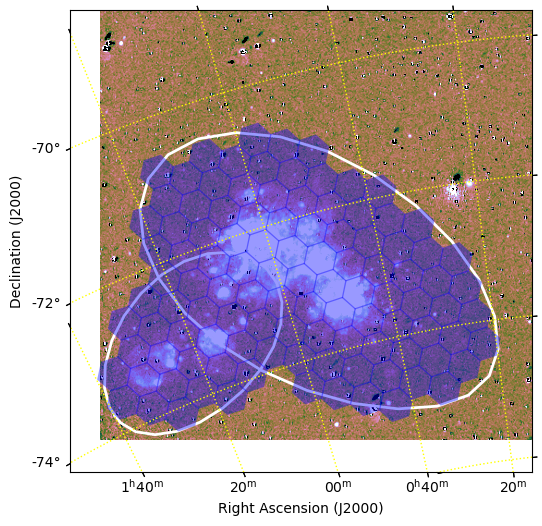

In [8]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection=wcs)
norm = ImageNormalize(dat, interval=PercentileInterval(98),
                      stretch=SqrtStretch())
ax.imshow(dat, origin='lower', cmap='cubehelix', norm=norm)
ax.coords[0].set_axislabel('Right Ascension (J2000)')
ax.coords[1].set_axislabel('Declination (J2000)')
ax.grid(color='yellow', ls=':', lw=1)
ax.set_xlim(0, 500)
ax.set_ylim(0, 500)
smc_e_skyreg.to_pixel(wcs).plot(ax=ax, color='w', lw=2.0)
smc_w_skyreg.to_pixel(wcs).plot(ax=ax, color='w', lw=2.0)
for p in tbl:
    patch = ifu.get_patch(scale=lvm160.plate_scale, centre=[p['RA'], p['DEC']], pa=p['PA'],
                            edgecolor='None', linewidth=0.0, alpha=0.4, facecolor='b',
                            transform=ax.get_transform('fk5'))[0]
    ax.add_patch(patch)

# Overlay on MCELS H$\alpha$

In [9]:
# Load MCELS image
dat, hdr = fits.getdata('mosaic_ha_02_sub.37.fits', header=True)
wcs = WCS(hdr)
print(dat.shape)

(8500, 9400)


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Changed DATE-OBS from '22/11/1997' to '1997-11-22''. [astropy.wcs.wcs]


152425.4


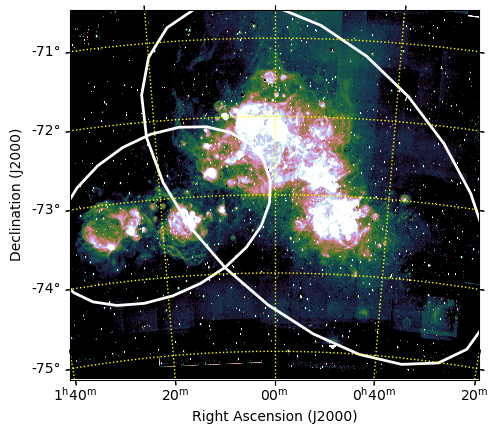

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection=wcs)
vmin, vmax = MinMaxInterval().get_limits(dat)
print(vmax)
norm = ImageNormalize(dat, vmin=0, vmax=120,
                      stretch=SqrtStretch())
ax.imshow(dat, origin='lower', cmap='cubehelix', norm=norm)
ax.coords[0].set_axislabel('Right Ascension (J2000)')
ax.coords[1].set_axislabel('Declination (J2000)')
ax.grid(color='yellow', ls=':', lw=1)
smc_e_skyreg.to_pixel(wcs).plot(ax=ax, color='w', lw=2.0)
smc_w_skyreg.to_pixel(wcs).plot(ax=ax, color='w', lw=2.0)


# Overlay on GASKAP HI

In [11]:
# Load GASKAP image
dat, hdr = fits.getdata('SMC_askap_parkes_PBC_K_mom0.fits', header=True)
wcs = WCS(hdr,naxis=2)
print(dat.shape)

(1, 3471, 3901)


7294.0073


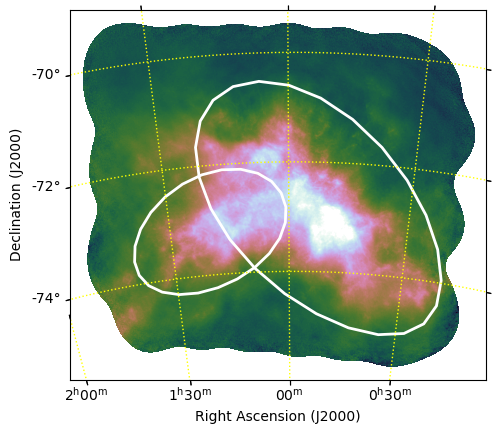

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection=wcs)
vmin, vmax = MinMaxInterval().get_limits(dat)
print(vmax)
norm = ImageNormalize(dat, interval=PercentileInterval(99),
                      stretch=SqrtStretch())
ax.imshow(dat[0], origin='lower', cmap='cubehelix', norm=norm)
ax.coords[0].set_axislabel('Right Ascension (J2000)')
ax.coords[1].set_axislabel('Declination (J2000)')
ax.grid(color='yellow', ls=':', lw=1)
smc_e_skyreg.to_pixel(wcs).plot(ax=ax, color='w', lw=2.0)
smc_w_skyreg.to_pixel(wcs).plot(ax=ax, color='w', lw=2.0)
